# Week 1 - Finite Difference Method

## 1. Motivation

Many engineering and science systems change over time, space, and many other dimensions of interest. In mathematics, function derivatives are often used to model these changes. However, in practice the function may not be explicitly known, or the function may be implicitly represented by a set of data points. In these cases and others, it may be desirable to compute derivatives numerically rather than analytically.

This tutorial discusses the implementation of several different finite difference methods, which are frequently used to numerically approximate and calculate the derivatives of functions. 

## 2. Background

The derivative of a function $f(x)$ at $x=a$ is the limit:

$$f'(a) = \mathop {\lim }\limits_{h \to 0} {{f(a + h) - f(a)} \over h}$$

Difference Formulas:

There are 3 main difference formulas for numerically approximating derivatives.

(1) The forward difference formula with step size $h$ is:

$$f'(a) \approx {{f(a + h) - f(a)} \over h}$$

(2) The backward difference formula with step size $h$ is:

$$f'(a) \approx {{f(a) - f(a - h)} \over h}$$

(3) The central difference formula with step size $h$ is the average of the forward and backwards difference formulas:

$$f'(a) \approx {1 \over 2}\Big({{f(a + h) - f(a)} \over h} + {{f(a) - f(a - h)} \over h}\Big) = {{f(a + h) - f(a - h)} \over {2h}}$$

# 3. Implementation

Let us write a function called derivative which takes input parameters $f$, $a$, method and $h$ (with default values method='central' and h=0.01) and returns the corresponding difference formula for f'(a) with step size $h$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## 3.1 The forward difference formula 

In [4]:
def derivative_forward(f,a,h=0.01):
    '''Compute the difference formula for f'(a) with step size h.

    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a : number
        Compute derivative at x = a
    method : string
        Difference formula: 'forward'
    h : number
        Step size in difference formula

    Returns
    -------
    float
        Difference formula:
            forward: f(a+h) - f(a))/h           
    '''
    return (f(a + h) - f(a))/h

## 3.2 The backward difference formula 

In [5]:
def derivative_backward(f,a,h=0.01):
    '''Compute the difference formula for f'(a) with step size h.

    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a : number
        Compute derivative at x = a
    method : string
        Difference formula: 'backward'
    h : number
        Step size in difference formula

    Returns
    -------
    float
        Difference formula:
            backward: f(a) - f(a-h))/h          
    '''
    return (f(a) - f(a-h))/h

## 3.3 The central difference formula 

In [6]:
def derivative_central(f,a,h=0.01):
    '''Compute the difference formula for f'(a) with step size h.

    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a : number
        Compute derivative at x = a
    method : string
        Difference formula: 'backward'
    h : number
        Step size in difference formula

    Returns
    -------
    float
        Difference formula:
            central: (f(a+h) - f(a-h))/2h         
    '''
    return (f(a+h) - f(a-h))/(2*h)

## 3.4 Combination of three methods

In [18]:
def derivative(f,a,method='central',h=0.01):
    '''Compute the difference formula for f'(a) with step size h.

    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a : number
        Compute derivative at x = a
    method : string
        Difference formula: 'forward', 'backward' or 'central'
    h : number
        Step size in difference formula

    Returns
    -------
    float
        Difference formula:
            central: f(a+h) - f(a-h))/2h
            forward: f(a+h) - f(a))/h
            backward: f(a) - f(a-h))/h            
    '''
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")

# 4. Test of function

Let's test our function on some simple functions. For example, we know

$${d \over {dx}}{\left. {(\cos x)} \right|_{x = 0}} =  - \sin (0) = 0$$

In [8]:
derivative_forward(np.cos,0,h=1e-4)

-4.999999969612645e-05

In [9]:
derivative_forward(np.cos,0,h=1e-8) # h=1e-8 will give an accurate result

0.0

In [10]:
derivative_backward(np.cos,0,h=1e-4)

4.999999969612645e-05

In [11]:
derivative_central(np.cos,0,h=1e-4)

0.0

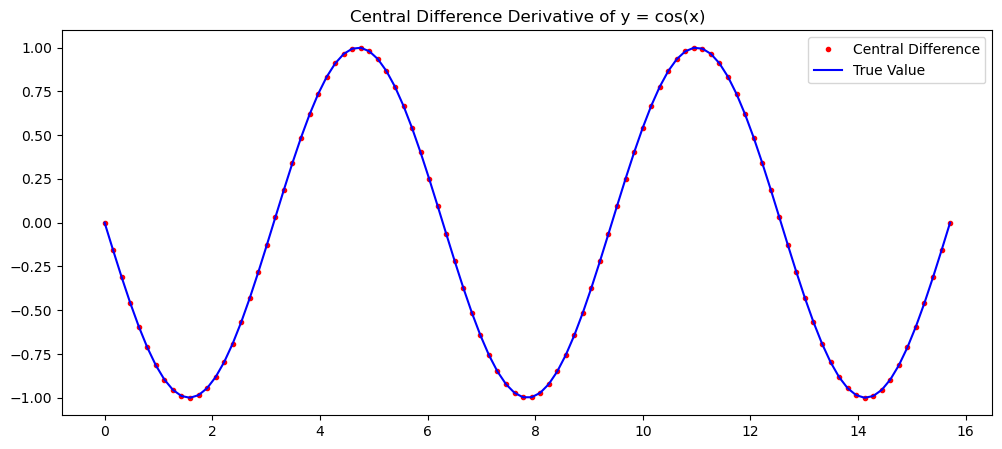

In [14]:
# Visualise the results for the first derivative of y = cos(x) over a specific domain

x = np.linspace(0,5*np.pi,100)
dydx = derivative(np.cos,x)

dYdx = -np.sin(x)

plt.figure(figsize=(12,5))
plt.plot(x,dydx,'r.',label='Central Difference')
plt.plot(x,dYdx,'b',label='True Value')

plt.title('Central Difference Derivative of y = cos(x)')
plt.legend(loc='best')
plt.show()

Let's compute and plot the derivative of a complicated function:

$$f(x)={({{4{x^2} + 2x + 1} \over {x + 2{e^x}}})^x}$$


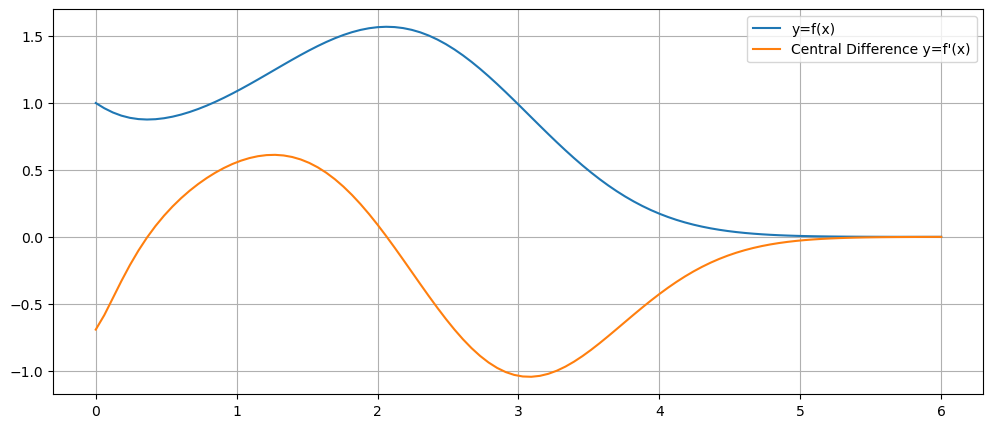

In [17]:
x = np.linspace(0,6,100)

def f(x):
    f=((4*x**2 + 2*x + 1)/(x + 2*np.exp(x)))**x
    return f

# f = lambda x: ((4*x**2 + 2*x + 1)/(x + 2*np.exp(x)))**x # You can also define a function by using lambda 

y = f(x)
dydx = derivative(f,x)

plt.figure(figsize=(12,5))
plt.plot(x,y,label='y=f(x)')
plt.plot(x,dydx,label="Central Difference y=f'(x)")
plt.legend()
plt.grid(True)

plt.show()

# 5. Error analysis

We can still use the absolute and relative error equation to do the analysis if we know the analytical solution. 

### Numerical derivative and exact solution
num_abs_error = abs(exact_solution - forward_diff)

num_relative_error= abs(exact_solution - forward_diff)/exact_solution

For example: we want to estimate the error of forward differentiation method on the function:

$${d \over {dx}}{\left. {(\cos x)} \right|_{x = 0}} =  - \sin (0) = 0$$

In [16]:
forward_diff=derivative_forward(np.cos,0,h=1e-4)

exact_solution=0

max_error = abs(exact_solution - forward_diff)

print('The numerical error is:', max_error)

The numerical error is: 4.999999969612645e-05
